# Visualize observed usage
This notebook includes the Python code used to generate the plots at the end of the [observed usage](./index.ipynb) BASH notebook.

In [1]:
%matplotlib inline
import json
import os
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

PLOT_TEXT = {
    'efficiency': ('Efficiency', '% of memory estimate used at runtime'),
    'estimated_memory_gb': ('Estimated', 'estimated memory usage (GB)'),
    'runtime_memory_gb': ('Runtime observed', 'observed memory used at runtime (GB)')
}

if not os.path.exists('./images'):
    os.makedirs('./images')


class PlotText:
    '''Class to hold plot title and axis labels

    Parameters
    ----------
    filter_field : str
        Column of DataFrame to plot.
    '''
    def __init__(self, filter_field):
        self.title, self.xlabel = PLOT_TEXT.get(filter_field, (filter_field, ''))
        self.filename = filter_field.split('_', 1)[0]


def boxplot(filter_field, xlim=None):
    '''Function to generate box-and-whisker plots

    Parameters
    ----------
    filter_field : str

    xlim : 2-tuple or None

    Returns
    -------
    xlim : 2-tuple
    '''
    fig_text = PlotText(filter_field)
    fig, ax1 = plt.subplots()
    box = the_dfs[filter_field].plot.box(vert=False, title=fig_text.title, ax=ax1, color='#0067a0')
    if xlim:
        plt.xlim(xlim)
    if filter_field == 'efficiency':
        ax1.axvline(x=100, color='#ea234b', linewidth=0, zorder=-100)
    box.set_xlabel(fig_text.xlabel)
    box.set_ylabel('run')
    plt.savefig(f'./images/{fig_text.filename}.png', dpi=600, bbox_inches='tight')
    return box.get_xlim()


def efficiency(df):
    '''Function to create efficiency column and sort DataFrame by that column

    Parameters
    ----------
    df : pd.DataFrame

    Returns
    -------
    pd.DataFrame
    '''
    df['efficiency'] = df['runtime_memory_gb'] / df['estimated_memory_gb'] * 100
    df.sort_values(by='efficiency')
    return df


def load_cbl(cbl):
    '''Function to load callback.log into a DataFrame

    Parameters
    ----------
    cbl : str
        path to callback log

    Returns
    -------
    pd.DataFrame
    '''
    with open(cbl, 'r') as old_file:
        return pd.DataFrame([
            json.loads(line) for
            line in old_file.readlines() if 'estimated_memory_gb' in line
        ])

In [2]:
dfs = {
    "0010042 with `raise_insufficient: Off`": load_cbl("cpac_runs/insufficient/log/pipeline_cpac_anat/sub-0010042_ses-1/callback.log"),
    "0010042 with `--mem_gb 14.8`": load_cbl("cpac_runs/enough/log/pipeline_cpac_anat/sub-0010042_ses-1/callback.log"),
    "0010042 with `--runtime_usage […]callback.log`": load_cbl("cpac_runs/optimized/log/pipeline_cpac_anat/sub-0010042_ses-1/callback.log"),
    "5971050 with `--runtime_usage […]callback.log`": load_cbl("cpac_runs/optimized/log/pipeline_cpac_anat/sub-5971050_ses-1/callback.log"),
}
the_dfs = {
    df_key: pd.DataFrame.from_dict({key: efficiency(dfs[key])[df_key] for key in list(dfs.keys())[::-1]})
    for df_key in ['efficiency', 'runtime_memory_gb', 'estimated_memory_gb']
}

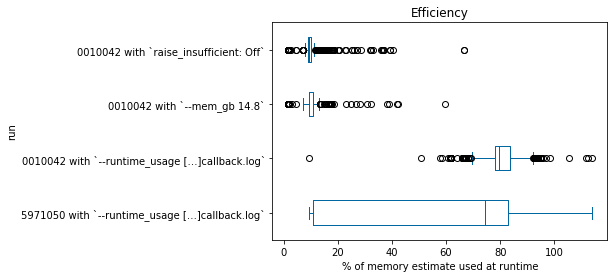

In [3]:
xlim = boxplot('efficiency')

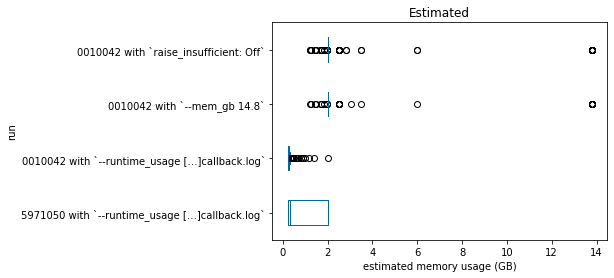

In [4]:
xlim = boxplot('estimated_memory_gb')

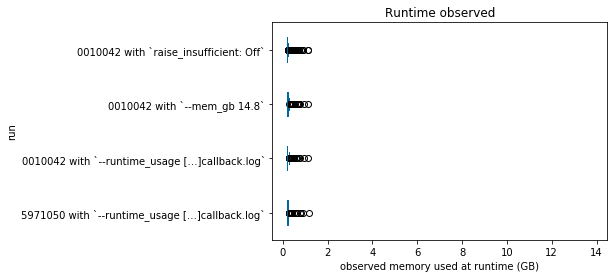

In [5]:
xlim = boxplot('runtime_memory_gb', xlim)